# Blinkit Analysis

#### Import Libraries

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

#### Import Raw Data


In [33]:
df=pd.read_csv('C:/Users/Tarun/Downloads/blinkit_data.csv',delimiter=',')

#### Sample Data


In [34]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [35]:
df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


#### Size of Data


In [36]:
print({'Size of Data':df.shape})

{'Size of Data': (8523, 12)}


#### Field Info

In [37]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

#### Data Types

In [38]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

#### Data Cleaning

In [39]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [40]:
df['Item Fat Content']=df['Item Fat Content'].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'})

In [41]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


### BUSINESS REQUIREMENTS

#### Kpi's Requirements

In [42]:
#Total Sales
total_sales=df['Sales'].sum()

#average_sales
average_sales=df['Sales'].mean()

#No.of items sold
no_of_items_sold=df['Sales'].count()

#Average rating
average_rating=df['Rating'].mean()

#Display

print(f"Total sale:{total_sales:,.0f}")
print(f"Average Sales:{average_sales:,.1f}")
print(f"No of Items Sold:{no_of_items_sold:,.0f}")
print(f"Average Rating:{average_rating:,.1f}")

Total sale:1,201,681
Average Sales:141.0
No of Items Sold:8,523
Average Rating:4.0


### CHART REQUIREMENTS

##### Total Sales by Fat Content

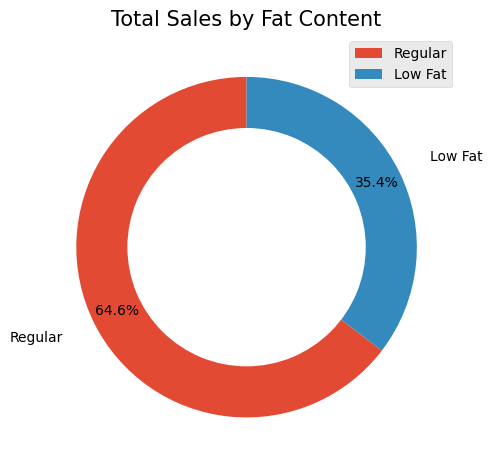

In [107]:
sales_by_fat=df.groupby('Item Fat Content')['Sales'].sum()
l=['Regular','Low Fat']
plt.pie(sales_by_fat,labels=l,startangle=90,autopct='%0.1f%%',labeldistance=1.2,pctdistance=0.85,
        textprops={'fontsize':10,'color':'black'})
plt.pie([1],radius=0.7,colors='w')
plt.title('Total Sales by Fat Content',fontsize=15)
plt.legend(loc=1)
plt.tight_layout()
plt.show()

##### Analysis:
>Regular products 64.6% of total sales.

>Low Fat products 35.4% of total sales.

>The market shows a stronger preference for Regular fat products, with sales almost double those of Low Fat.

Conclusion:
The data indicates that customers significantly favor Regular fat content products over Low Fat ones. While there is noticeable demand for Low Fat (over one-third of total sales), Regular fat products dominate the market


#### Total Sales by Item type

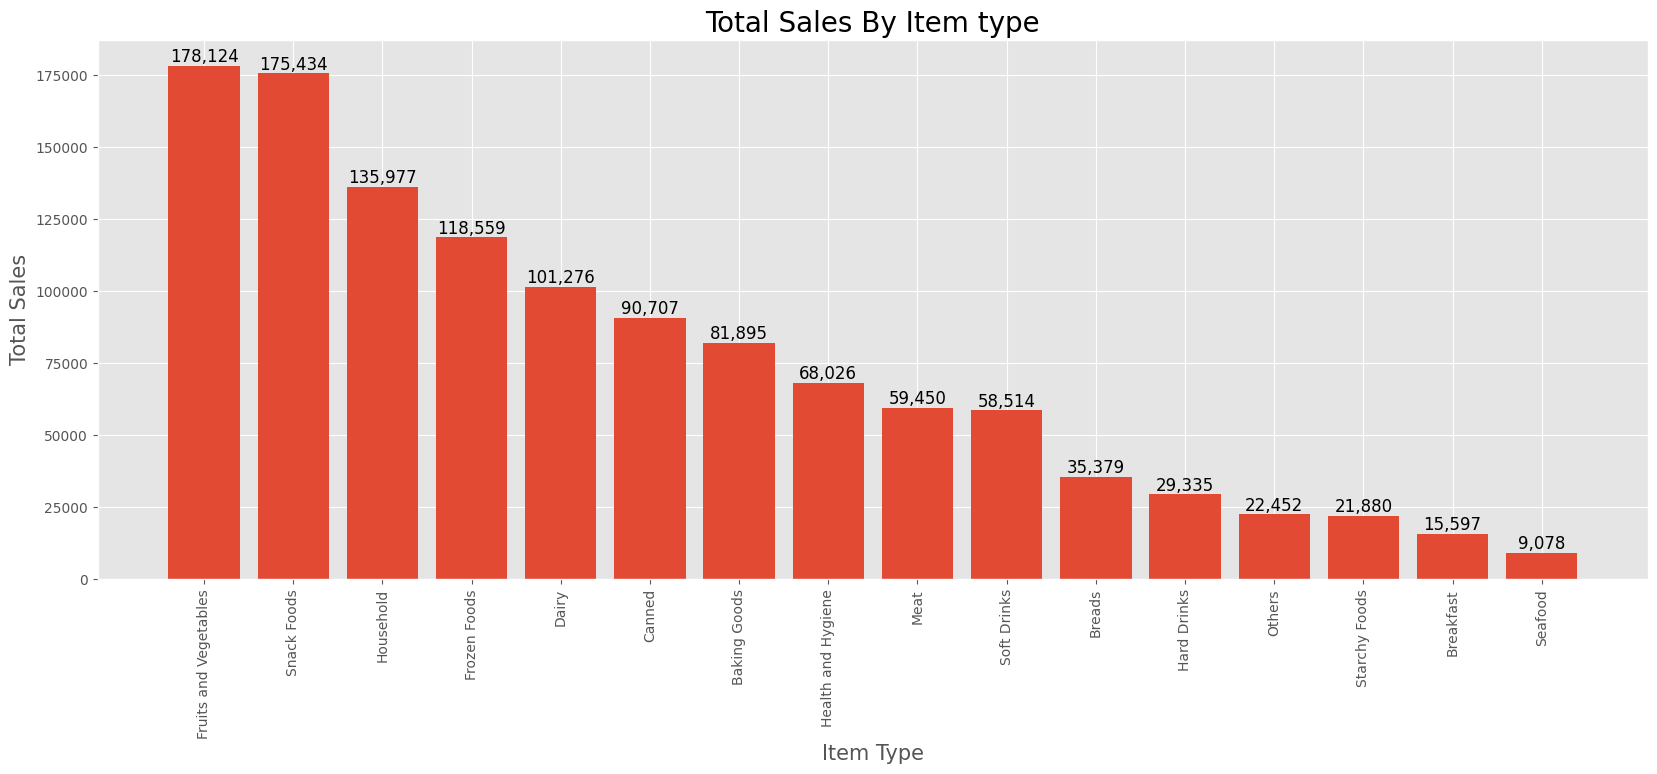

In [96]:
sales_by_type=df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(20,7))
plt.bar(sales_by_type.index,sales_by_type.values,width=0.8)
plt.xticks(rotation=90)
for index, data in enumerate(sales_by_type.values):
    plt.text(x=index, y=data, s=f"{data:,.0f}",fontsize=12,ha='center',va='bottom')
plt.title('Total Sales By Item type',fontsize=20)
plt.xlabel('Item Type',fontsize=15)
plt.ylabel('Total Sales',fontsize=15)
plt.grid(True)
plt.show()

##### Analysis:
>Top Sellers: 
 Fruits and Vegetables (178,124)
 Snack Foods (175,434)
 Together, these categories dominate sales, indicating strong consumer demand for daily essentials and convenient snacks.

>LMid-range Sales: 
Household items (135,977), Frozen Foods (118,559), and Dairy (101,276) form the next major group of contributors.
Canned goods (90,707) and Baking Goods (81,895) also show steady demand.

>Lower Sales:
 Health & Hygiene (68,026), Meat (59,450), and Soft Drinks (58,514) have moderate contributions.
 Breads (35,379), Hard Drinks (29,335), Others (22,452), and Starchy Foods (21,880) are relatively smaller segments.

>Lowest Sellers:
 Breakfast (15,597) and Seafood (9,078) show the least sales, possibly due to limited consumer demand, availability, or higher prices.

Conclusion:
The sales data reveals a clear dominance of Fruits & Vegetables and Snack Foods, highlighting consumers’ preference for daily fresh items and quick, ready-to-eat products. Household, frozen, and dairy items also play a significant role in driving overall sales.

On the other hand, categories like Seafood and Breakfast items contribute minimally, suggesting either a niche market, supply constraints, or lack of consumer preference.


#### Fat Content by Outlet for Total Sales

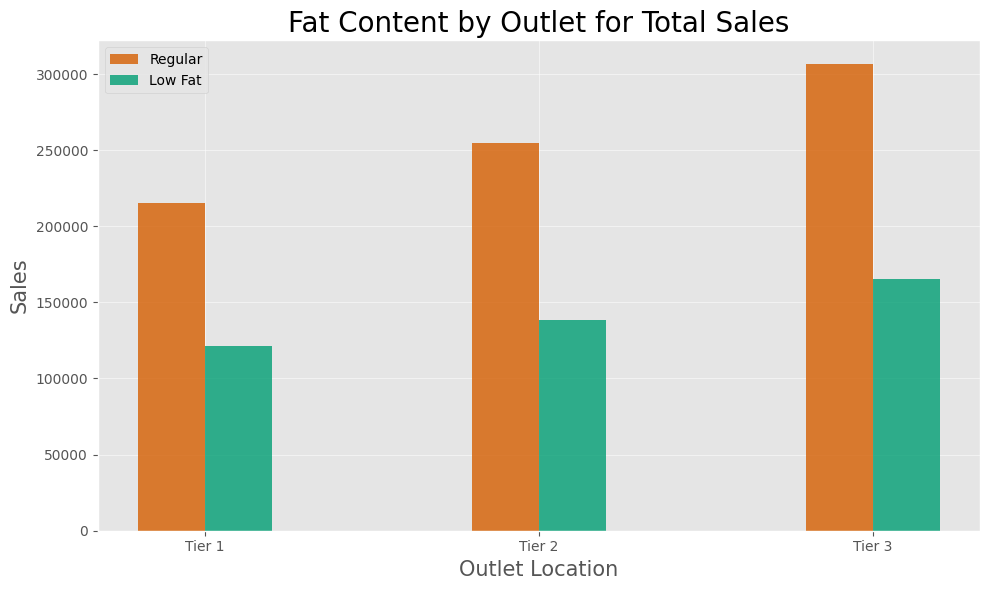

In [106]:
grouped=df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
p=np.arange(len(grouped.index))
plt.figure(figsize=(10,6))
plt.bar(p,grouped.values[:,0],width=0.2,label="Regular",color='#d55e00',alpha=0.8)
plt.bar(p+0.2,grouped.values[:,1],width=0.2,label='Low Fat',color='#009e73',alpha=0.8)
plt.xticks(p+0.2/2,grouped.index)
plt.title('Fat Content by Outlet for Total Sales',fontsize=20)
plt.xlabel('Outlet Location',fontsize=15)
plt.ylabel('Sales',fontsize=15)
plt.legend()
plt.tight_layout()
plt.grid(alpha=0.5)
plt.show()


##### Analysis:
>In all three outlet tiers, "Regular" fat content products have significantly higher total sales than "Low Fat" products.

>Sales for both "Regular" and "Low Fat" products increase from Tier 1 to Tier 3 outlets, with Tier 3 having the highest sales in both categories.

>The gap between "Regular" and "Low Fat" product sales is consistent and substantial, indicating a clear preference for "Regular" products regardless of outlet tier.

Conclusion:
"Regular" fat content products dominate total sales in all outlet tiers, and both product types see higher sales in higher-tier outlets, highlighting stronger consumer demand for regular fat content and in higher-tier locations.


#### Total Sales by Outlet Establishment

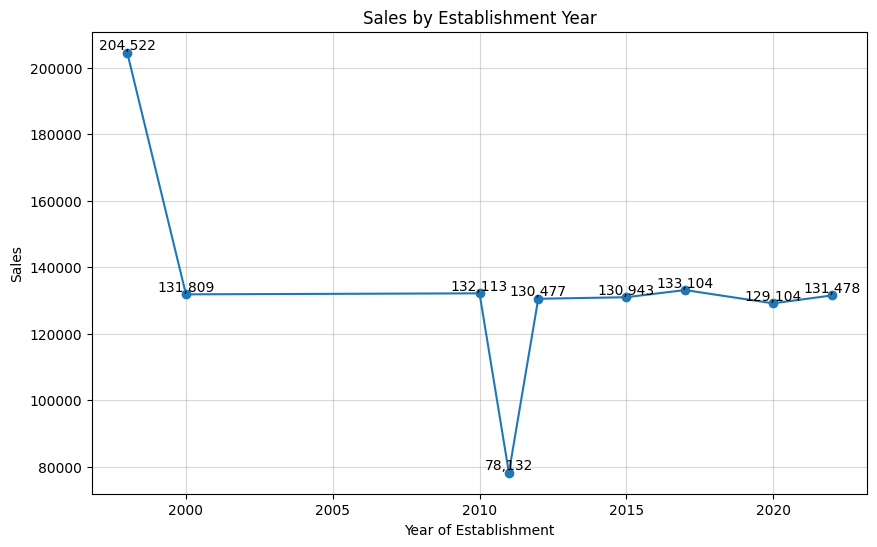

In [89]:
sales_by_establishment=df.groupby('Outlet Establishment Year')['Sales'].sum()

plt.figure(figsize=(10,6))
plt.plot(sales_by_establishment,linestyle='-',marker='o')
plt.title('Sales by Establishment Year')
plt.xlabel('Year of Establishment')
plt.ylabel('Sales')
for i, v in zip(sales_by_establishment.index,sales_by_establishment.values):
    plt.text(i, v,s=f"{v:,.0f}",ha='center',va='bottom')
plt.grid(alpha=0.5)
plt.show()


##### Analysis:
>Outlets established in 1997 show a notably high sales value, exceeding 200,000, which is a strong outlier compared to later years

>Establishments from 1999 to 2024 generally record sales in a narrow band around 130,000, indicating relative consistency except for two years.

>There is a marked dip in 2010, where sales fall sharply to approximately 78,000, the lowest in the series, followed by a quick rebound in subsequent years.

Conclusion:
stable sales levels with a significant but short-lived drop in 2010, implying consistent sales performance over time except for isolated anomalies.


#### Sales by Outlet Size

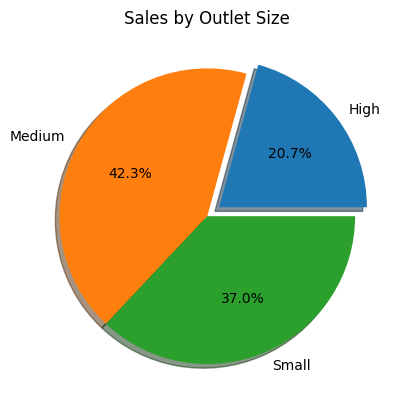

In [71]:
sales_by_outlet_size=df.groupby('Outlet Size')['Sales'].sum()
l=[i for i in sales_by_outlet_size.index ]
e=[0.1,0,0]
plt.pie(sales_by_outlet_size,labels=l,autopct='%0.1f%%',explode=e,shadow=True)
plt.title('Sales by Outlet Size')

plt.show()


##### Analysis:
>Medium-sized outlets contribute the largest share to total sales at 42.3%.

>Establishments from 1999 to 2024 generally record sales in a narrow band around 130,000, indicating relative consistency except for two years.

>High-sized outlets make up only 20.7% of total sales, significantly less than both medium and small outlets.

Conclusion:
Medium-sized outlets dominate sales, with small outlets also performing well, while high-sized outlets lag behind, suggesting that larger outlet size does not necessarily translate to higher total sales.


#### Sales by Outlet Location

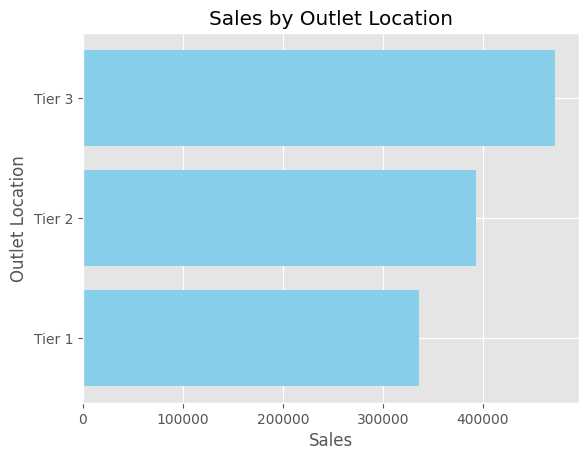

In [113]:
sales_by_outlet_location=df.groupby('Outlet Location Type')['Sales'].sum()

plt.Figure(figsize=(10,5))
plt.barh(sales_by_outlet_location.index,sales_by_outlet_location.values,color='skyblue')
plt.title('Sales by Outlet Location')
plt.ylabel('Outlet Location')
plt.xlabel('Sales')
plt.grid(True)
plt.show()

##### Analysis:
>Tier 3 outlets record the highest total sales, followed by Tier 2, with Tier 1 having the lowest sales among the three.

>There is a clear upward trend in sales as the outlet tier increases from Tier 1 to Tier 3.

>The differences in sales between tiers are substantial, indicating that higher-tier outlets outperform lower-tier ones.

Conclusion:
Sales performance improves significantly with higher outlet tiers, with Tier 3 locations generating the most sales, highlighting the importance of outlet tier in overall sales contribution.
